In [47]:
# Nama    : Taufik Kurahman Sasmita
# Nim     : 1103200008
# Tugas   : 5
# ChatGpt : https://chat.openai.com/c/a7a5819c-b97b-4279-8e8d-c71552029976

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Memuat Data

In [23]:
import pandas as pd

# Ganti path dengan path sesuai dengan lokasi dataset Anda
path = "/content/drive/MyDrive/Dataset/IT Salary Survey EU  2020.csv"

# Membaca dataset sebagai dataframe
df = pd.read_csv(path)

In [22]:
# Menampilkan 5 baris pertama dari dataframe
df.head()

,Timestamp,Age,Gender,City,Position,Total years of experience,Years of experience in Germany,Seniority level,Your main technology / programming language,Other technologies/programming languages you use often,...,Annual bonus+stocks one year ago. Only answer if staying in same country,Number of vacation days,Employment status,Сontract duration,Main language at work,Company size,Company type,Have you lost your job due to the coronavirus outbreak?,"Have you been forced to have a shorter working week (Kurzarbeit)? If yes, how many hours per week","Have you received additional monetary support from your employer due to Work From Home? If yes, how much in 2020 in EUR"
0,24/11/2020 11:14:15,26.0,Male,Munich,Software Engineer,5,3,Senior,TypeScript,"Kotlin, Javascript / Typescript",...,10000,30,Full-time employee,Unlimited contract,English,51-100,Product,No,NaN,NaN
1,24/11/2020 11:14:16,26.0,Male,Berlin,Backend Developer,7,4,Senior,Ruby,NaN,...,5000,28,Full-time employee,Unlimited contract,English,101-1000,Product,No,NaN,NaN
2,24/11/2020 11:14:21,29.0,Male,Berlin,Software Engineer,12,6,Lead,Javascript / Typescript,"Javascript / Typescript, Docker",...,100000,30,Self-employed (freelancer),Temporary contract,English,101-1000,Product,Yes,NaN,NaN
3,24/11/2020 11:15:24,28.0,Male,Berlin,Frontend Developer,4,1,Junior,Javascript,NaN,...,NaN,24,Full-time employee,Unlimited contract,English,51-100,Startup,No,NaN,NaN
4,24/11/2020 11:15:46,37.0,Male,Berlin,Backend Developer,17,6,Senior,C# .NET,".NET, SQL, AWS, Docker",...,NaN,29,Full-time employee,Unlimited contract,English,101-1000,Product,No,NaN,NaN


In [25]:
# Menampilkan jumlah nilai kosong untuk setiap kolom
print(df.isnull().sum())

Timestamp                                                                                                                    0
Age                                                                                                                         27
Gender                                                                                                                      10
City                                                                                                                         0
Position                                                                                                                     6
Total years of experience                                                                                                   16
Years of experience in Germany                                                                                              32
Seniority level                                                                                                

Mengeksplore Data

In [28]:
# Menampilkan informasi dasar tentang dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1253 entries, 0 to 1252
Data columns (total 23 columns):
 #   Column                                                                                                                   Non-Null Count  Dtype  
---  ------                                                                                                                   --------------  -----  
 0   Timestamp                                                                                                                1253 non-null   object 
 1   Age                                                                                                                      1226 non-null   float64
 2   Gender                                                                                                                   1243 non-null   object 
 3   City                                                                                                                     1253 non-null   o

In [27]:
# Menampilkan statistika dasar dari dataset
df.describe()

,Age,Yearly brutto salary (without bonus and stocks) in EUR,Annual brutto salary (without bonus and stocks) one year ago. Only answer if staying in the same country,"Have you been forced to have a shorter working week (Kurzarbeit)? If yes, how many hours per week"
count,1226.000000,1.253000e+03,8.850000e+02,373.000000
mean,32.509788,8.027904e+07,6.322459e+05,12.967828
std,5.663804,2.825061e+09,1.680508e+07,15.275174
min,20.000000,1.000100e+04,1.100000e+04,0.000000
25%,29.000000,5.880000e+04,5.500000e+04,0.000000
50%,32.000000,7.000000e+04,6.500000e+04,0.000000
75%,35.000000,8.000000e+04,7.500000e+04,30.000000
max,69.000000,1.000000e+11,5.000000e+08,40.000000


In [30]:
# Dictionary untuk memetakan nama-nama fitur yang lama ke nama-nama fitur yang baru
new_column_names = {
    'Total years of experience': 'Total experience',
    'Years of experience in Germany': 'Experience in Germany',
    'Your main technology / programming language': 'Main programming language',
    'Other technologies/programming languages you use often': 'Other programming languages',
    'Yearly brutto salary (without bonus and stocks) in EUR': 'Yearly brutto salary',
    'Yearly bonus + stocks in EUR': 'Yearly bonus and stocks',
    'Annual brutto salary (without bonus and stocks) one year ago. Only answer if staying in the same country': 'Previous yearly brutto salary',
    'Annual bonus+stocks one year ago. Only answer if staying in same country': 'Previous yearly bonus and stocks',
    'Number of vacation days': 'Vacation days',
    'Main language at work': 'Main work language',
    'Have you lost your job due to the coronavirus outbreak?': 'Lost job due to COVID-19',
    'Have you been forced to have a shorter working week (Kurzarbeit)? If yes, how many hours per week': 'Kurzarbeit hours per week',
    'Have you received additional monetary support from your employer due to Work From Home? If yes, how much in 2020 in EUR': 'Additional monetary support in 2020'
}

# Memperbarui nama-nama kolom menggunakan metode rename()
df = df.rename(columns=new_column_names)

# Menampilkan 5 baris pertama dari dataframe setelah perubahan nama kolom
df.head()


,Timestamp,Age,Gender,City,Position,Total experience,Experience in Germany,Seniority level,Main programming language,Other programming languages,...,Previous yearly bonus and stocks,Vacation days,Employment status,Сontract duration,Main work language,Company size,Company type,Lost job due to COVID-19,Kurzarbeit hours per week,Additional monetary support in 2020
0,24/11/2020 11:14:15,26.0,Male,Munich,Software Engineer,5,3,Senior,TypeScript,"Kotlin, Javascript / Typescript",...,10000,30,Full-time employee,Unlimited contract,English,51-100,Product,No,NaN,NaN
1,24/11/2020 11:14:16,26.0,Male,Berlin,Backend Developer,7,4,Senior,Ruby,NaN,...,5000,28,Full-time employee,Unlimited contract,English,101-1000,Product,No,NaN,NaN
2,24/11/2020 11:14:21,29.0,Male,Berlin,Software Engineer,12,6,Lead,Javascript / Typescript,"Javascript / Typescript, Docker",...,100000,30,Self-employed (freelancer),Temporary contract,English,101-1000,Product,Yes,NaN,NaN
3,24/11/2020 11:15:24,28.0,Male,Berlin,Frontend Developer,4,1,Junior,Javascript,NaN,...,NaN,24,Full-time employee,Unlimited contract,English,51-100,Startup,No,NaN,NaN
4,24/11/2020 11:15:46,37.0,Male,Berlin,Backend Developer,17,6,Senior,C# .NET,".NET, SQL, AWS, Docker",...,NaN,29,Full-time employee,Unlimited contract,English,101-1000,Product,No,NaN,NaN


Membersihkan Data

In [32]:
df.isnull().sum()

Timestamp                               0
Age                                    27
Gender                                 10
City                                    0
Position                                6
Total experience                        0
Experience in Germany                   0
Seniority level                        12
Main programming language               0
Other programming languages             0
Yearly brutto salary                    0
Yearly bonus and stocks                 0
Previous yearly brutto salary           0
Previous yearly bonus and stocks        0
Vacation days                           0
Employment status                      17
Сontract duration                      29
Main work language                      0
Company size                           18
Company type                           25
Lost job due to COVID-19                0
Kurzarbeit hours per week               0
Additional monetary support in 2020     0
dtype: int64

In [31]:
# Mendefinisikan nilai yang akan digunakan untuk mengisi nilai kosong
# Misalnya, kita akan mengisi nilai kosong dengan "Unknown"
fill_value = "Unknown"

# Daftar kolom yang ingin diisi nilai kosong
columns_to_fill = [
    'Total experience',
    'Experience in Germany',
    'Main programming language',
    'Other programming languages',
    'Yearly brutto salary',
    'Yearly bonus and stocks',
    'Previous yearly brutto salary',
    'Previous yearly bonus and stocks',
    'Vacation days',
    'Main work language',
    'Lost job due to COVID-19',
    'Kurzarbeit hours per week',
    'Additional monetary support in 2020'
]

# Mengisi nilai kosong dalam kolom-kolom tertentu dengan nilai yang telah ditentukan
df[columns_to_fill] = df[columns_to_fill].fillna(fill_value)

# Menampilkan 5 baris pertama dari dataframe setelah mengisi nilai kosong
df.head()


,Timestamp,Age,Gender,City,Position,Total experience,Experience in Germany,Seniority level,Main programming language,Other programming languages,...,Previous yearly bonus and stocks,Vacation days,Employment status,Сontract duration,Main work language,Company size,Company type,Lost job due to COVID-19,Kurzarbeit hours per week,Additional monetary support in 2020
0,24/11/2020 11:14:15,26.0,Male,Munich,Software Engineer,5,3,Senior,TypeScript,"Kotlin, Javascript / Typescript",...,10000,30,Full-time employee,Unlimited contract,English,51-100,Product,No,Unknown,Unknown
1,24/11/2020 11:14:16,26.0,Male,Berlin,Backend Developer,7,4,Senior,Ruby,Unknown,...,5000,28,Full-time employee,Unlimited contract,English,101-1000,Product,No,Unknown,Unknown
2,24/11/2020 11:14:21,29.0,Male,Berlin,Software Engineer,12,6,Lead,Javascript / Typescript,"Javascript / Typescript, Docker",...,100000,30,Self-employed (freelancer),Temporary contract,English,101-1000,Product,Yes,Unknown,Unknown
3,24/11/2020 11:15:24,28.0,Male,Berlin,Frontend Developer,4,1,Junior,Javascript,Unknown,...,Unknown,24,Full-time employee,Unlimited contract,English,51-100,Startup,No,Unknown,Unknown
4,24/11/2020 11:15:46,37.0,Male,Berlin,Backend Developer,17,6,Senior,C# .NET,".NET, SQL, AWS, Docker",...,Unknown,29,Full-time employee,Unlimited contract,English,101-1000,Product,No,Unknown,Unknown


In [33]:
df.isnull().sum()
# semua data sudah terisi, mari kita visualisasikan

Timestamp                               0
Age                                    27
Gender                                 10
City                                    0
Position                                6
Total experience                        0
Experience in Germany                   0
Seniority level                        12
Main programming language               0
Other programming languages             0
Yearly brutto salary                    0
Yearly bonus and stocks                 0
Previous yearly brutto salary           0
Previous yearly bonus and stocks        0
Vacation days                           0
Employment status                      17
Сontract duration                      29
Main work language                      0
Company size                           18
Company type                           25
Lost job due to COVID-19                0
Kurzarbeit hours per week               0
Additional monetary support in 2020     0
dtype: int64

**Visualisasi**

Visualisasi Numerik

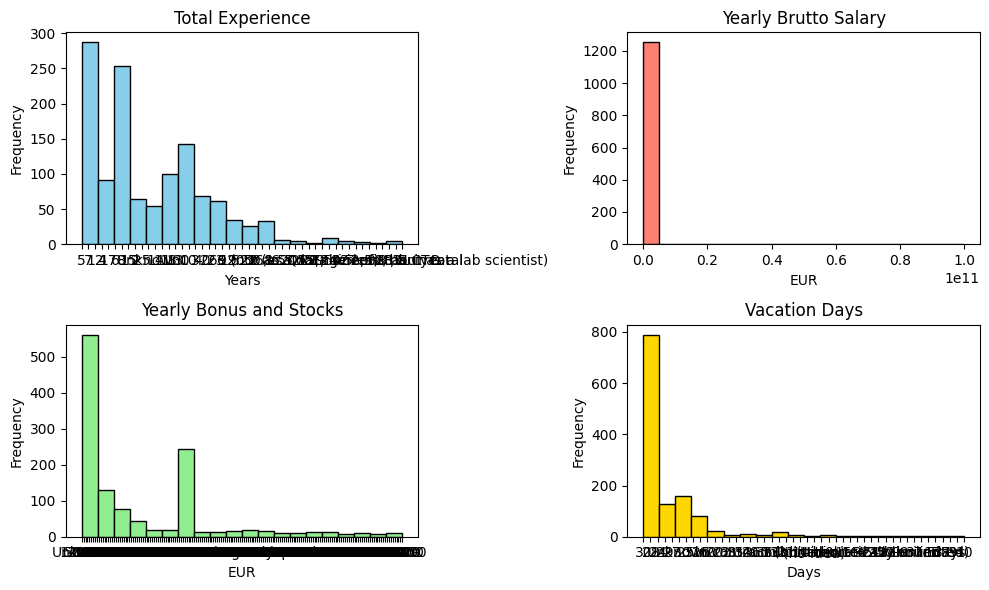

In [34]:
import matplotlib.pyplot as plt

# Mengatur ukuran visualisasi
plt.figure(figsize=(10, 6))

# Histogram untuk Total experience
plt.subplot(2, 2, 1)
plt.hist(df['Total experience'], bins=20, color='skyblue', edgecolor='black')
plt.title('Total Experience')
plt.xlabel('Years')
plt.ylabel('Frequency')

# Histogram untuk Yearly brutto salary
plt.subplot(2, 2, 2)
plt.hist(df['Yearly brutto salary'], bins=20, color='salmon', edgecolor='black')
plt.title('Yearly Brutto Salary')
plt.xlabel('EUR')
plt.ylabel('Frequency')

# Histogram untuk Yearly bonus and stocks
plt.subplot(2, 2, 3)
plt.hist(df['Yearly bonus and stocks'], bins=20, color='lightgreen', edgecolor='black')
plt.title('Yearly Bonus and Stocks')
plt.xlabel('EUR')
plt.ylabel('Frequency')

# Histogram untuk Vacation days
plt.subplot(2, 2, 4)
plt.hist(df['Vacation days'], bins=20, color='gold', edgecolor='black')
plt.title('Vacation Days')
plt.xlabel('Days')
plt.ylabel('Frequency')

# Menampilkan visualisasi
plt.tight_layout()
plt.show()


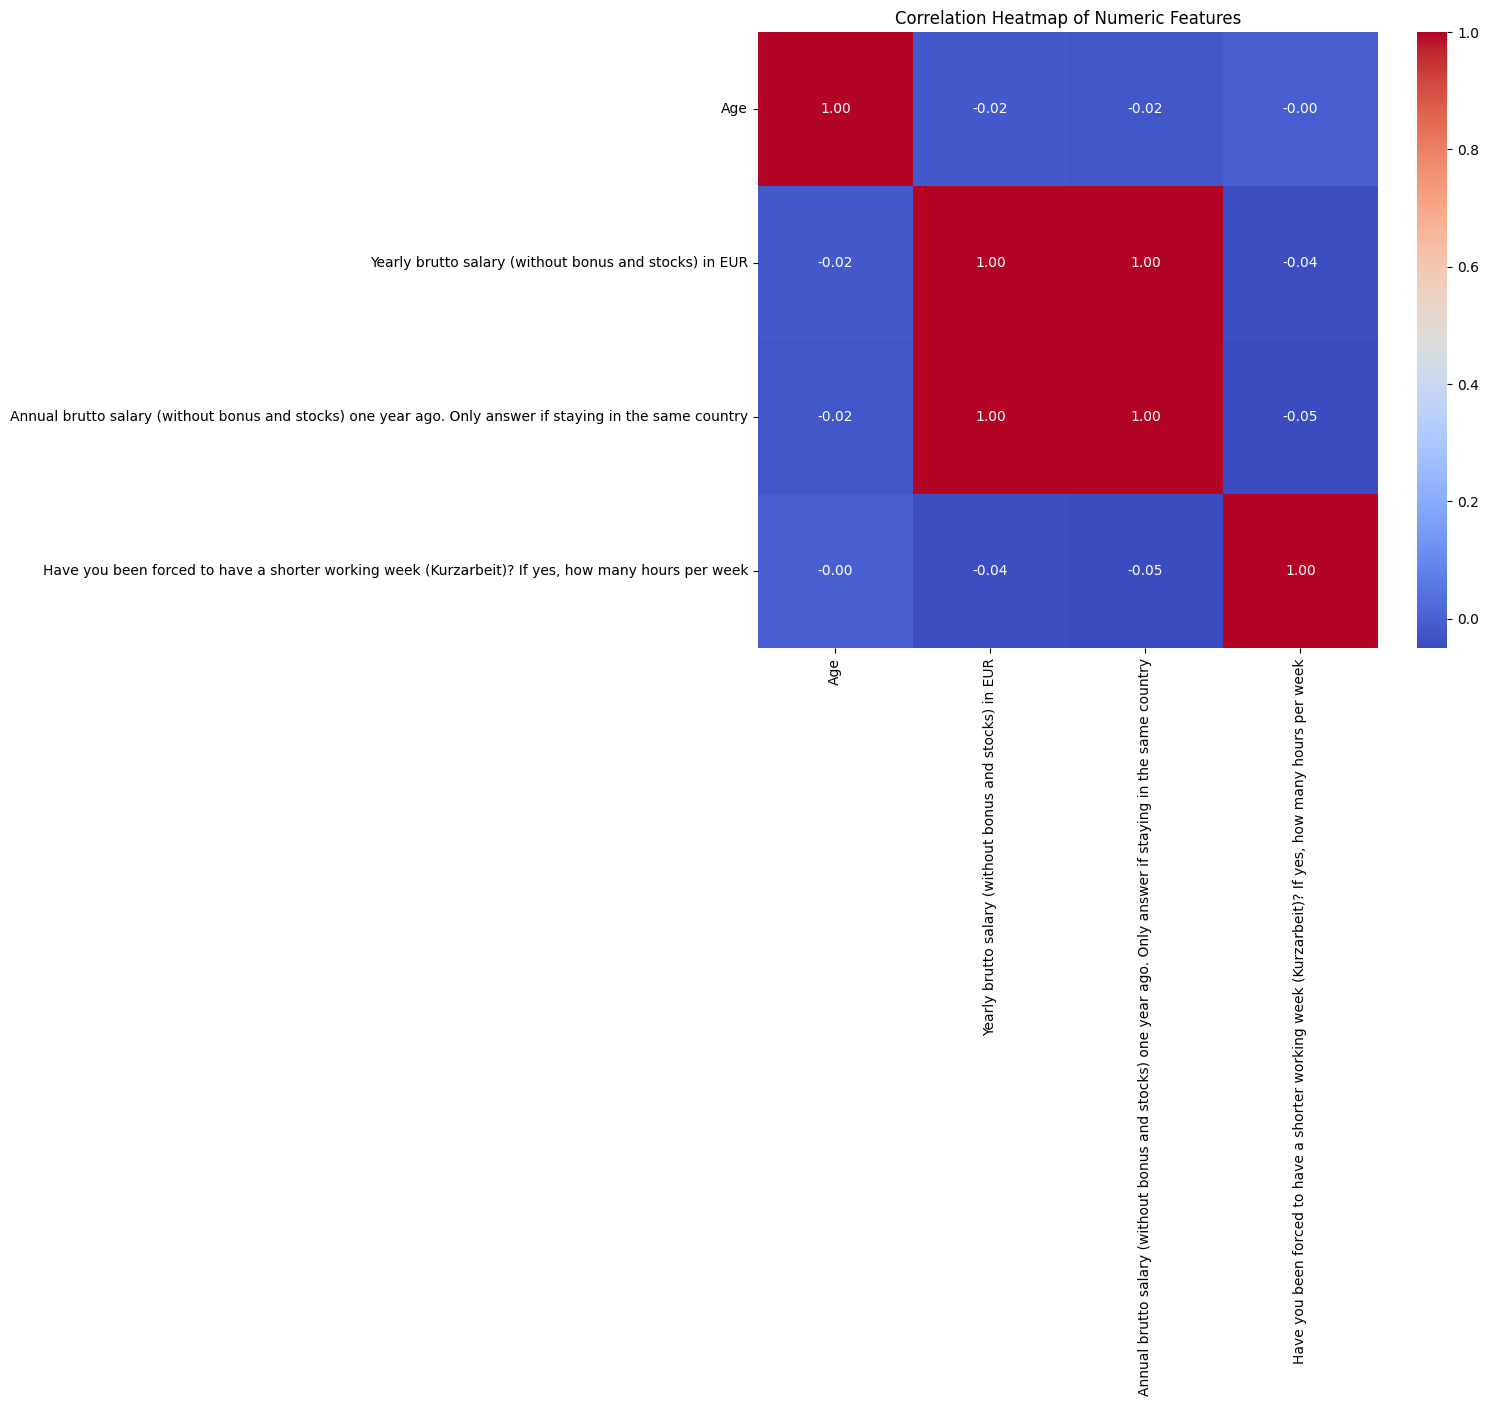

In [45]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Ganti path dengan path sesuai dengan lokasi dataset Anda
path = "/content/drive/MyDrive/Dataset/IT Salary Survey EU  2020.csv"

# Membaca dataset sebagai dataframe
df = pd.read_csv(path)

# Memilih hanya fitur-fitur numerik
numeric_features = df.select_dtypes(include=['int64', 'float64'])

# Menghitung korelasi antar fitur numerik
correlation_matrix = numeric_features.corr()

# Menampilkan heatmap korelasi
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numeric Features')
plt.show()
